In [237]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [238]:
data_test = pd.read_csv('./data/BTC_hour_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,106591.0,29356.460000,5242.435795,29354.515628,-142.557143,0.761927
1,123334.0,29261.495286,6154.053924,29247.201666,-94.964714,-0.178496
2,76811.0,29300.483750,3565.355044,29308.043545,38.988464,0.338335
3,106278.0,29033.386250,6173.248975,29053.798420,-267.097500,-2.366390
4,183297.0,29058.150000,9878.326297,29062.477560,24.763750,-1.657816


In [239]:
data_test.describe()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
count,5.810000e+03,5810.000000,5810.000000,5810.000000,5810.000000,5810.000000
mean,1.657142e+05,44358.966904,6608.271453,44357.146174,3.023225,0.049650
std,1.069836e+05,9574.048871,5716.186073,9573.236830,438.668037,1.666908
min,2.890400e+04,28955.223750,961.270358,28999.309357,-4500.940179,-10.114173
25%,1.036755e+05,35481.581071,3469.801383,35471.393204,-202.758000,-1.045810
50%,1.417945e+05,44126.226250,5048.160152,44097.560700,2.261875,0.118209
75%,1.963722e+05,53729.587143,7810.599720,53732.551142,215.865701,1.164534
max,2.029928e+06,64616.061429,101564.598620,64593.936603,4709.723075,10.821005


In [240]:
act_dp = data_test['DeltaPrice']

print(max(act_dp), min(act_dp))

# max_val = round(max(act_dp))
max_val = 3



4709.723074814283 -4500.940178571436


In [241]:
pred_dp1 = []

for i in range(0, len(act_dp)):
        pred_val = act_dp [i] +  random.randint(-max_val, max_val)
        pred_dp1.append(pred_val)
    

In [242]:
pred_dp2 = []

for i in range(0, len(act_dp)):
        if (i == 0):
                pred_dp2.append(act_dp[i])
        else: 
                pred_val = act_dp [i - 1] +  random.randint(-max_val, max_val)
                pred_dp2.append(pred_val)
                

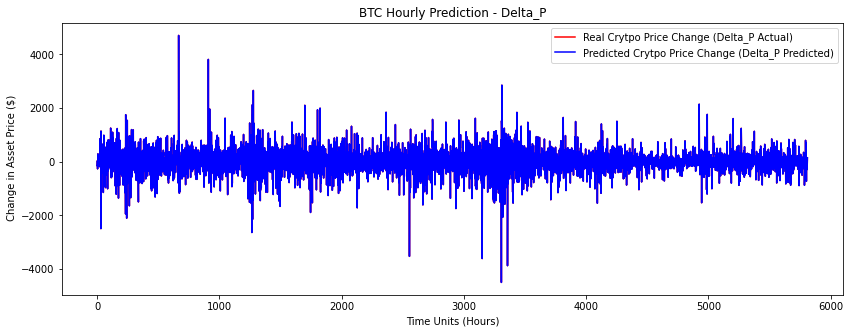

In [243]:
plt.figure(figsize=(14,5))
plt.plot(act_dp, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(pred_dp1, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Hourly Prediction - Delta_P')
plt.xlabel('Time Units (Hours)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

In [244]:
pred_list = []
price_list = []

count = 0
for each in data_test['Close']:

    prediction = each + act_dp [count]
    price = each + pred_dp2 [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1

In [245]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 621.7148632414797


In [246]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.010102973749879979


In [247]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.5901187812015838
